In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv("./ECG_Processed.csv")
data.head()

,Pat_ID,ID,age,sex,Acute infarction (localization),Smoker,i_Mean_ECG_Rate,i_Mean_ECG_Quality,i_Coeff_R_peaks,i_Mean_ECG_Phase_Atrial,...,0_Mean_ECG_Phase_Completion_Ventricular,0_Coeff_RR_intervals,0_Coeff_PR_intervals,0_Coeff_QT_intervals,0_std_pp_intervals,0_std_QRS_Interval,0_HRV_SDNN,0_HRV_RMSSD,0_HRV_pNN20,target
0,patient001,s0010_re,81.0,female,infero-latera,no,81.773949,0.603859,27.156243,0.197663,...,0.489792,0.012929,0.233522,0.134078,0.052042,0.000052,9.580167,11.401754,3.921569,Myocardial infarction
1,patient001,s0014lre,81.0,female,infero-latera,no,86.246142,0.925716,26.404201,0.207896,...,0.495395,0.011190,0.276411,1.643388,0.053522,0.000042,7.811761,7.815354,3.658537,Myocardial infarction
2,patient001,s0016lre,81.0,female,infero-latera,no,79.856263,0.875193,27.421546,0.198774,...,0.495920,0.021960,0.231771,1.229889,0.051539,0.000039,16.561997,22.153438,14.473684,Myocardial infarction
3,patient002,s0015lre,58.0,female,anterior,yes,78.863330,0.789990,27.602788,0.139431,...,0.496615,0.027987,0.190472,1.765927,0.051201,0.000047,21.366385,9.045374,4.000000,Myocardial infarction
4,patient003,s0017lre,63.0,male,infero-postero-lateral,yes,72.289757,0.711433,28.875294,0.210481,...,0.494705,0.028571,0.191781,1.428576,0.048413,0.000045,23.794461,11.989885,10.218978,Myocardial infarction


In [41]:
data['target'].value_counts()

target
Myocardial infarction     367
Healthy control            80
Dysrhythmia                16
Cardiomyopathy             15
Bundle branch block        15
Hypertrophy                 7
Valvular heart disease      6
Myocarditis                 4
Stable angina               2
Heart failure (NYHA 2)      1
Heart failure (NYHA 3)      1
Heart failure (NYHA 4)      1
Palpitation                 1
Unstable angina             1
Name: count, dtype: int64

In [42]:
data = data.drop(columns={'Pat_ID','ID'})

In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Remove rows where 'target' is NaN
data = data.dropna(subset=['target'])

# Reinitialize LabelEncoder after dropping NaN values
label_encoder = LabelEncoder()
data['target'] = label_encoder.fit_transform(data['target'])

# Explicitly convert target column to integer
data['target'] = data['target'].astype(int)

# Save the modified CSV file (overwrite the existing one)
data.to_csv(file_path, index=False)

# Display updated label mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Updated Label Encoding Mapping:")
for original, encoded in label_mapping.items():
    print(f"{original} → {encoded}")

print(f"\n CSV file '{file_path}' updated successfully!")


Updated Label Encoding Mapping:
Bundle branch block → 0
Cardiomyopathy → 1
Dysrhythmia → 2
Healthy control → 3
Heart failure (NYHA 2) → 4
Heart failure (NYHA 3) → 5
Heart failure (NYHA 4) → 6
Hypertrophy → 7
Myocardial infarction → 8
Myocarditis → 9
Palpitation → 10
Stable angina → 11
Unstable angina → 12
Valvular heart disease → 13

 CSV file 'D:\Machine-Learning\ECG-Based Arrhythmia Detection\Preprocessing\ECG_Processed_1.csv' updated successfully!


In [44]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['sex','Acute infarction (localization)', 'Smoker']

# Apply label encoding to each specified column
for col in columns_to_encode:
    data[col] = label_encoder.fit_transform(data[col])

data.head()

,age,sex,Acute infarction (localization),Smoker,i_Mean_ECG_Rate,i_Mean_ECG_Quality,i_Coeff_R_peaks,i_Mean_ECG_Phase_Atrial,i_Mean_ECG_Phase_Completion_Atrial,i_Mean_ECG_Phase_Ventricular,...,0_Mean_ECG_Phase_Completion_Ventricular,0_Coeff_RR_intervals,0_Coeff_PR_intervals,0_Coeff_QT_intervals,0_std_pp_intervals,0_std_QRS_Interval,0_HRV_SDNN,0_HRV_RMSSD,0_HRV_pNN20,target
0,81.0,0,5,0,81.773949,0.603859,27.156243,0.197663,0.489167,0.498944,...,0.489792,0.012929,0.233522,0.134078,0.052042,0.000052,9.580167,11.401754,3.921569,8
1,81.0,0,5,0,86.246142,0.925716,26.404201,0.207896,0.495786,0.493150,...,0.495395,0.011190,0.276411,1.643388,0.053522,0.000042,7.811761,7.815354,3.658537,8
2,81.0,0,5,0,79.856263,0.875193,27.421546,0.198774,0.496376,0.471129,...,0.495920,0.021960,0.231771,1.229889,0.051539,0.000039,16.561997,22.153438,14.473684,8
3,58.0,0,0,2,78.863330,0.789990,27.602788,0.139431,0.495812,0.312683,...,0.496615,0.027987,0.190472,1.765927,0.051201,0.000047,21.366385,9.045374,4.000000,8
4,63.0,1,9,2,72.289757,0.711433,28.875294,0.210481,0.494297,0.382452,...,0.494705,0.028571,0.191781,1.428576,0.048413,0.000045,23.794461,11.989885,10.218978,8


In [52]:
data['target'].value_counts()

target
8     367
3      80
2      16
1      15
0      15
7       7
13      6
9       4
11      2
4       1
5       1
6       1
10      1
12      1
Name: count, dtype: int64

In [51]:
data.isnull().sum()

age                                0
sex                                0
Acute infarction (localization)    0
Smoker                             0
i_Mean_ECG_Rate                    0
                                  ..
0_std_QRS_Interval                 0
0_HRV_SDNN                         0
0_HRV_RMSSD                        0
0_HRV_pNN20                        0
target                             0
Length: 65, dtype: int64

In [49]:
# Check correlation of 'age' with other numerical columns
correlation_matrix = data.corr()
age_correlation = correlation_matrix['age'].sort_values(ascending=False)

# Get column names with positive correlation
positive_correlation_columns = age_correlation[age_correlation > 0].index.tolist()

positive_correlation_columns.remove('age')

print("Columns to use as inputs for RandomForest:")
print(positive_correlation_columns)

Columns to use as inputs for RandomForest:
['i_Coeff_QT_intervals', 'target', 'i_Mean_ECG_Phase_Atrial', 'ii_Mean_ECG_Phase_Atrial', 'ii_Coeff_QT_intervals', 'iii_Coeff_PR_intervals', 'ii_Coeff_PR_intervals', 'iii_Coeff_QT_intervals', 'iii_Mean_ECG_Phase_Atrial', '0_Mean_ECG_Rate', 'i_Mean_ECG_Rate', '0_std_pp_intervals', 'i_std_pp_intervals', 'i_Mean_ECG_Phase_Ventricular', '0_Mean_ECG_Quality', 'iii_Mean_ECG_Rate', 'i_Coeff_PR_intervals', 'ii_Mean_ECG_Rate', 'ii_std_pp_intervals', '0_std_QRS_Interval', '0_Mean_ECG_Phase_Atrial', 'ii_HRV_RMSSD', 'iii_Coeff_RR_intervals', 'iii_std_pp_intervals', 'iii_Mean_ECG_Phase_Ventricular', 'ii_std_QRS_Interval', 'i_HRV_RMSSD', 'ii_Coeff_RR_intervals', 'ii_HRV_SDNN', 'iii_HRV_RMSSD', 'iii_HRV_SDNN', 'i_Coeff_RR_intervals', 'i_HRV_SDNN', '0_Mean_ECG_Phase_Ventricular', 'iii_Mean_ECG_Quality', 'ii_Mean_ECG_Quality', 'iii_std_QRS_Interval']


In [50]:
# Split data into rows with and without missing 'age'
df_not_null = data[data['age'].notnull()]
df_null = data[data['age'].isnull()]

# Define the training and prediction sets
X_train = df_not_null[positive_correlation_columns]
y_train = df_not_null['age']
X_null = df_null[positive_correlation_columns]

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict missing 'age' values
predicted_ages = rf_model.predict(X_null)

# Fill the missing 'age' values in the dataframe
data.loc[data['age'].isnull(), 'age'] = predicted_ages

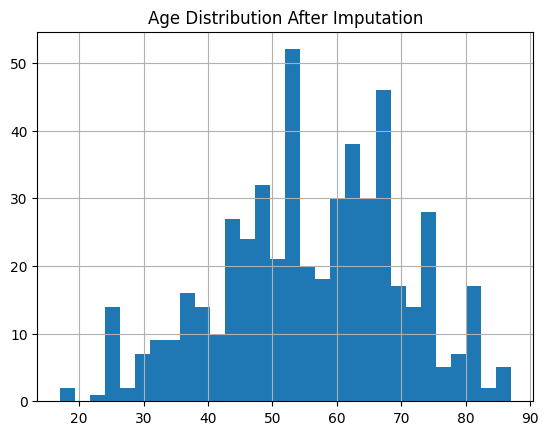

In [53]:
import matplotlib.pyplot as plt
data['age'].hist(bins=30)
plt.title('Age Distribution After Imputation')
plt.show()

In [54]:
# Separate features (X) and target (y)
X = data.drop(columns=['target'])  # Exclude the target
y = data['target']  # Target variable
y.value_counts()

target
8     367
3      80
2      16
1      15
0      15
7       7
13      6
9       4
11      2
4       1
5       1
6       1
10      1
12      1
Name: count, dtype: int64

In [55]:
# Step 2: Standardize the data (important for PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

In [56]:
# Step 3: Apply PCA
pca = PCA()
pca.fit(data_scaled)

PCA()

In [57]:
# Step 4: Analyze explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

In [58]:
#Determine how many components explain, for example, 95% variance
num_components_95 = next(i for i, v in enumerate(cumulative_variance) if v >= 0.95) + 1
print(f"Number of components explaining 95% variance: {num_components_95}")

Number of components explaining 95% variance: 29


In [59]:
# Step 5: Find feature importance for the top components
components = pca.components_  # Shape: (num_components, num_features)
feature_importance = pd.DataFrame(components[:num_components_95].T,
                                   columns=[f'PC{i+1}' for i in range(num_components_95)],
                                   index=X.columns)
print("Feature importance for top principal components:")
print(feature_importance)

Feature importance for top principal components:
                                      PC1       PC2       PC3       PC4  \
age                              0.031006  0.111299 -0.092064  0.037683   
sex                             -0.017153 -0.063276  0.042674  0.014257   
Acute infarction (localization) -0.068113  0.017772 -0.071560  0.008483   
Smoker                           0.019321 -0.091312  0.057834  0.037331   
i_Mean_ECG_Rate                  0.208813  0.147842  0.013788  0.054535   
...                                   ...       ...       ...       ...   
0_std_pp_intervals               0.209454  0.098334  0.000852  0.068110   
0_std_QRS_Interval               0.174670  0.042500  0.047778  0.069690   
0_HRV_SDNN                      -0.083435  0.123398  0.120641 -0.056129   
0_HRV_RMSSD                     -0.093620  0.168130  0.126459 -0.053748   
0_HRV_pNN20                     -0.166321  0.125445  0.132399 -0.047765   

                                      PC5       PC

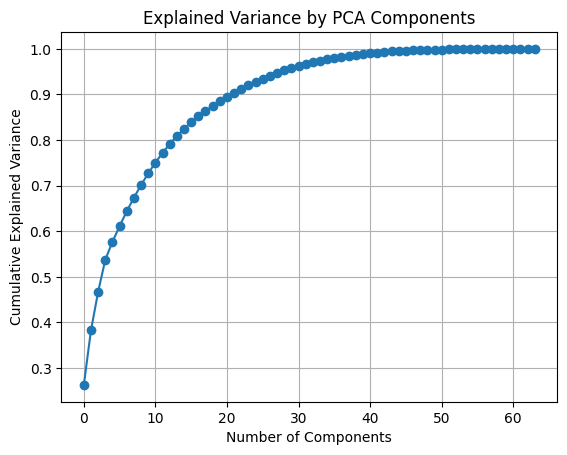

In [60]:
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

In [61]:
top_features_pc1 = feature_importance['PC1'].abs().sort_values(ascending=False)
print("Top features contributing to PC1:")
print(top_features_pc1.head(10))  # Top 10 features

Top features contributing to PC1:
i_std_pp_intervals     0.218921
i_Coeff_R_peaks        0.215546
0_Coeff_R_peaks        0.215005
ii_std_pp_intervals    0.213192
0_std_pp_intervals     0.209454
i_Mean_ECG_Rate        0.208813
0_Mean_ECG_Rate        0.208133
ii_Coeff_R_peaks       0.206293
ii_Mean_ECG_Rate       0.203411
iii_Mean_ECG_Rate      0.199487
Name: PC1, dtype: float64


In [62]:
n_components = 29

# Initialize PCA with selected number of components
pca = PCA(n_components=n_components)

# Fit PCA and transform data
X_pca = pca.fit_transform(data_scaled)

# Convert to DataFrame for better readability
transformed_df = pd.DataFrame(X_pca, columns=[f'Feature{i+1}' for i in range(n_components)])

In [63]:
transformed_df['target'] = y

In [ ]:
target
8     367
3      80
2      16
1      15
0      15
7       7
13      6
9       4
11      2
4       1
5       1
6       1
10      1
12      1
Name: count, dtype: int64

In [64]:
transformed_df['target'].value_counts()

target
8.0     355
3.0      73
2.0      15
0.0      15
1.0      13
7.0       7
13.0      6
9.0       4
11.0      2
4.0       1
5.0       1
6.0       1
10.0      1
12.0      1
Name: count, dtype: int64

In [ ]:

transformed_df['target'] = transformed_df['target'].astype(int)
# Print first few rows of transformed dataset
print(transformed_df.head())

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

Number of components explaining 95% variance: 29
Feature importance for top principal components:
                                      PC1       PC2       PC3       PC4  \
age                              0.031006  0.111299  0.092064  0.037683   
sex                              0.017153  0.063276  0.042674  0.014257   
Acute infarction (localization)  0.068113  0.017772  0.071560  0.008483   
Smoker                           0.019321  0.091312  0.057834  0.037331   
i_Mean_ECG_Rate                  0.208813  0.147842  0.013788  0.054535   
...                                   ...       ...       ...       ...   
0_std_pp_intervals               0.209454  0.098334  0.000852  0.068110   
0_std_QRS_Interval               0.174670  0.042500  0.047778  0.069690   
0_HRV_SDNN                       0.083435  0.123398  0.120641  0.056129   
0_HRV_RMSSD                      0.093620  0.168130  0.126459  0.053748   
0_HRV_pNN20                      0.166321  0.125445  0.132399  0.047765   

 

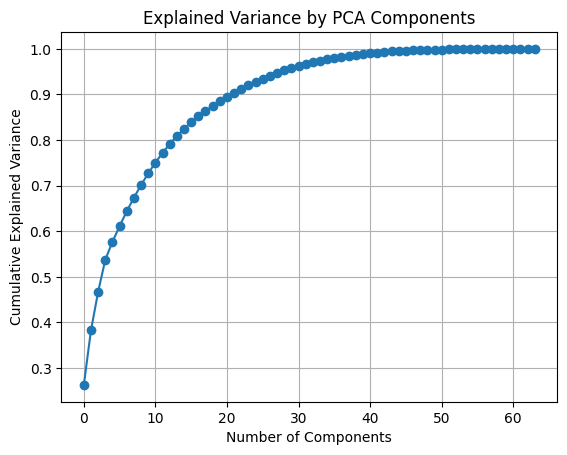

Top features contributing to PC1:
i_std_pp_intervals     0.218921
i_Coeff_R_peaks        0.215546
0_Coeff_R_peaks        0.215005
ii_std_pp_intervals    0.213192
0_std_pp_intervals     0.209454
i_Mean_ECG_Rate        0.208813
0_Mean_ECG_Rate        0.208133
ii_Coeff_R_peaks       0.206293
ii_Mean_ECG_Rate       0.203411
iii_Mean_ECG_Rate      0.199487
Name: PC1, dtype: float64
Missing values in transformed dataset: 0
Class distribution after PCA:
target
8     367
3      80
2      16
1      15
0      15
7       7
13      6
9       4
11      2
4       1
5       1
6       1
10      1
12      1
Name: count, dtype: int64
Updated dataset saved successfully!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop(columns=['target'])  
y = data['target'].astype(int)  # Ensure target is explicitly integer

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Explained variance analysis
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Determine number of components explaining 95% variance
num_components_95 = (cumulative_variance >= 0.95).argmax() + 1
print(f"Number of components explaining 95% variance: {num_components_95}")

# Feature importance for principal components
components = pca.components_
feature_importance = pd.DataFrame(components[:num_components_95].T, 
                                  columns=[f'PC{i+1}' for i in range(num_components_95)], 
                                  index=X.columns).abs()
print("Feature importance for top principal components:")
print(feature_importance)

# Plot cumulative variance
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

# Top 10 features contributing to PC1
top_features_pc1 = feature_importance['PC1'].sort_values(ascending=False)
print("Top features contributing to PC1:")
print(top_features_pc1.head(10))

# Use optimal number of components
pca = PCA(n_components=num_components_95)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame and check for NaN values
transformed_df = pd.DataFrame(X_pca, columns=[f'Feature{i+1}' for i in range(num_components_95)])

# Ensure target remains integer and check for alignment
transformed_df['target'] = y.reset_index(drop=True).astype(int)  

# Check for missing values
print(f"Missing values in transformed dataset: {transformed_df.isna().sum().sum()}")

# Check class distribution after PCA
print("Class distribution after PCA:")
print(transformed_df['target'].value_counts())

# Save to CSV
transformed_df.to_csv("ECG_After_PCA.csv", index=False)
print("Updated dataset saved successfully!")

In [3]:
import pandas as pd
df = pd.read_csv('./ECG_Processed.csv')
df.columns

Index(['Pat_ID', 'ID', 'age', 'sex', 'Acute infarction (localization)',
       'Smoker', 'i_Mean_ECG_Rate', 'i_Mean_ECG_Quality', 'i_Coeff_R_peaks',
       'i_Mean_ECG_Phase_Atrial', 'i_Mean_ECG_Phase_Completion_Atrial',
       'i_Mean_ECG_Phase_Ventricular',
       'i_Mean_ECG_Phase_Completion_Ventricular', 'i_Coeff_RR_intervals',
       'i_Coeff_PR_intervals', 'i_Coeff_QT_intervals', 'i_std_pp_intervals',
       'i_std_QRS_Interval', 'i_HRV_SDNN', 'i_HRV_RMSSD', 'i_HRV_pNN20',
       'ii_Mean_ECG_Rate', 'ii_Mean_ECG_Quality', 'ii_Coeff_R_peaks',
       'ii_Mean_ECG_Phase_Atrial', 'ii_Mean_ECG_Phase_Completion_Atrial',
       'ii_Mean_ECG_Phase_Ventricular',
       'ii_Mean_ECG_Phase_Completion_Ventricular', 'ii_Coeff_RR_intervals',
       'ii_Coeff_PR_intervals', 'ii_Coeff_QT_intervals', 'ii_std_pp_intervals',
       'ii_std_QRS_Interval', 'ii_HRV_SDNN', 'ii_HRV_RMSSD', 'ii_HRV_pNN20',
       'iii_Mean_ECG_Rate', 'iii_Mean_ECG_Quality', 'iii_Coeff_R_peaks',
       'iii_Mean_ECG_Phase